<h1 style="text-align: center;"> Computer simulations in statistical physics </h1>
<h2 style="text-align: center;"> Sheet 1 </h2>
<h2 style="text-align: center;"> Peter Gispert </h2>

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Task 1: Random number generators
The variance of the set $X = \{x_1, \dots, x_N \}$ is :
$$ \mathrm{Var}[X] = \frac{1}{N} \sum_{i=1}^{N} (x_i - \bar{x})^2 $$
where $\bar{x}$ denotes the average value of the set.

In [2]:
def average(x):
    """Returns the average value of the list x."""
    return np.sum(x) / len(x)

def variance(x):
    """Returns the variance of the list x."""
    mean = average(x)
    return 1/len(x) * np.sum((x - mean)**2)

def error(x):
    """Returns the standard error of the list x."""
    var = variance(x)
    return np.sqrt(var / len(x))

def randomNumberGenerator(n, a, c, m):
    """Returns a the n-th value of a pseudo-random series parameterised by a, c and m."""
    if n == 0:
        return 0
    else:
        return (a * randomNumberGenerator(n-1, a, c, m) + c) % m

The mean value of 100000 uniformly random numbers between 0 and 1 is 0.4986.
The average value of 100000 uniformly random numbers between 0 and 1 is 0.0833.
The standard error of 100000 uniformly random numbers between 0 and 1 is 0.0009.

This is to test my own random number generator:
The mean value of 1000 uniformly random numbers between 0 and 1 is 0.4919.
The average value of 1000 uniformly random numbers between 0 and 1 is 0.0779.
The standard error of 1000 uniformly random numbers between 0 and 1 is 0.0088.


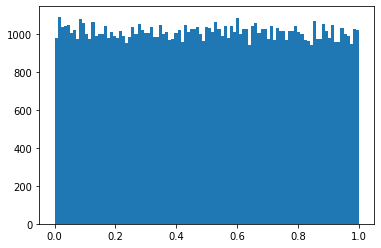

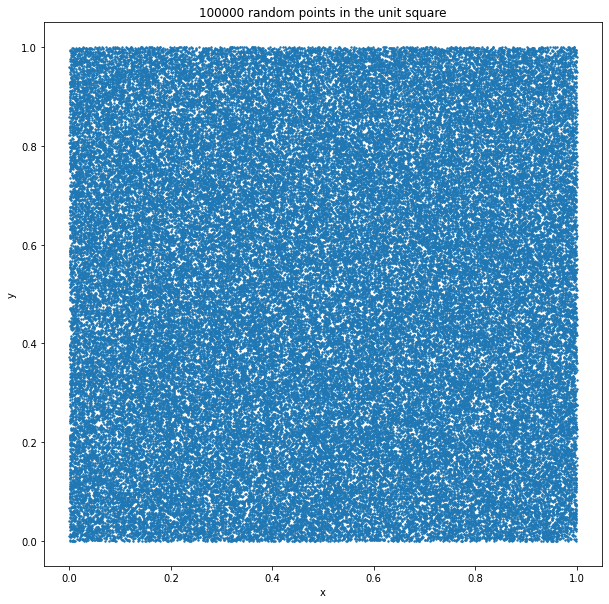

In [3]:
# a)
N = 10**5
randomNumbers = np.random.random(N)

# b)
mean = average(randomNumbers)
var = variance(randomNumbers)
stdError = error(randomNumbers)

print('The mean value of {} uniformly random numbers between 0 and 1 is {:.4f}.'.format(N, mean))
print('The average value of {} uniformly random numbers between 0 and 1 is {:.4f}.'.format(N, var))
print('The standard error of {} uniformly random numbers between 0 and 1 is {:.4f}.'.format(N, stdError))

# c)
_ = plt.hist(randomNumbers, bins=np.linspace(0,1,100))

# d)
x,y = np.random.random((2,10**5))
fig,ax = plt.subplots(figsize=(10,10))
ax.scatter(x,y, s=2)
ax.set_title('{} random points in the unit square'.format(N))
ax.set_xlabel('x')
ax.set_ylabel('y')

# e)
a = 1664525
c = 1013904223
m = 2**32
seed = 100
myRandomNumber = randomNumberGenerator(seed, a, c, m) / m
N2 = 10**3
myRandomNumbers = [randomNumberGenerator(i, a, c, m) / m for i in range(N2)]


mean = average(myRandomNumbers)
var = variance(myRandomNumbers)
stdError = error(myRandomNumbers)

print('\nThis is to test my own random number generator:')
print('The mean value of {} uniformly random numbers between 0 and 1 is {:.4f}.'.format(N2, mean))
print('The average value of {} uniformly random numbers between 0 and 1 is {:.4f}.'.format(N2, var))
print('The standard error of {} uniformly random numbers between 0 and 1 is {:.4f}.'.format(N2, stdError))

# Task 2: Monte Carlo Simulation - Estimating $\pi$

In [9]:
# Estimating pi

# generate random points in [-1,1]x[-1,1]
nRandom = 100000
x, y = np.random.random((2,nRandom)) * 2 - 1

# check which points lie in the unit circle
hits = (x**2 + y**2 <= 1)
pi = np.sum(hits) / len(hits) * 4
print('The estimate for pi is {:.4f}.'.format(pi))

The estimate for pi is 3.1448.


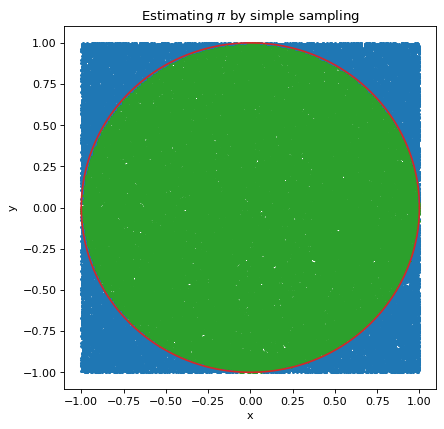

In [10]:
# graphical illustration
xCircle = np.linspace(-1,1,1000)
yCircle = np.sqrt(1 - xCircle**2)

fig, ax = plt.subplots(figsize=(6,6), dpi=80)
ax.scatter(x[hits],y[hits],s=3,color='tab:green')
ax.scatter(x[~hits],y[~hits],s=3,color='tab:blue')
ax.plot(xCircle, yCircle, color='tab:red')
ax.plot(xCircle, -yCircle, color='tab:red')
ax.set_title('Estimating $\pi$ by simple sampling')
ax.set_xlabel('x')
ax.set_ylabel('y');